## **Title**
Predictive Analytics for Optimizing Resource Allocation in Breast Cancer Care



## **Introduction**
Timely allocation of clinical resources is critical in breast cancer management, where early intervention drastically improves patient outcomes and reduces healthcare costs. Leveraging machine-learning techniques to triage cases by urgency enables hospitals and public-health programs to direct limited diagnostic, surgical, and oncological resources where they will have the greatest impact. This project applies predictive analytics to a well-known open dataset—the Kaggle Breast Cancer Wisconsin Diagnostic (WBCD) dataset—to develop and validate a model that assigns each case a priority level (high, medium, or low). The resulting insights help decision-makers streamline workflows, cut wait times, and improve patient survival and quality of care.

### **Project Description**

We will build an end-to-end **Jupyter Notebook** that performs the following tasks:

- **Ingests and explores** the WBCD dataset  
  - Contains 569 instances with 30 numeric features describing cell nuclei, and a diagnosis label.

- **Transforms** the original binary diagnosis  
  - Converts “M” (malignant) and “B” (benign) into a **three-tier issue-priority target**:  
    - **High** → malignant  
    - **Medium** → benign with worrisome features  
    - **Low** → clearly benign  

- **Cleans and preprocesses** the data  
  - Handles missing values, performs feature scaling, and checks for class imbalance.

- **Splits** the data into training, validation, and test sets  
  - Uses stratified sampling to maintain class proportions across sets.

- **Trains** a machine learning model  
  - Builds a **Random Forest Classifier**, and optionally a **Logistic Regression** model for benchmarking.

- **Evaluates** model performance  
  - Uses **Accuracy** and **macro-averaged F1-Score** as key metrics.  
  - Includes **confusion matrix** visualizations for deeper insight.

- **Reports** insights and results  
  - Highlights key performance metrics, feature importance, and provides **recommendations for operational deployment**.

All **code, narrative text, and visualizations** will be integrated in a single, well-commented Jupyter Notebook, designed to be accessible for both **technical reviewers** and **non-technical stakeholders**.


## **Problem Statement**
Hospital oncology units and screening programs often face bottlenecks when deciding which breast-cancer cases require immediate attention versus routine follow-up. Manual triage can be inconsistent and slow, potentially delaying life-saving interventions or overcommitting scarce resources. There is a need for a data-driven tool that reliably stratifies incoming cases into prioritized tiers, enabling efficient scheduling, staffing, and equipment allocation.

## **Main Objective**
Develop and validate a machine-learning model that predicts the priority level (high / medium / low) of breast-cancer cases using the Kaggle Breast Cancer Wisconsin dataset, thereby providing actionable insights for resource allocation in clinical workflows

## 🎯 **Specific Objectives**

### 1. 🧠 Data Understanding
- Load the WBCD (Wisconsin Breast Cancer Diagnostic) dataset.
- Inspect feature distributions.
- Identify potential data quality issues, such as:
  - Missing values
  - Outliers or anomalies
  - Class imbalance

---

### 2. 🧹 Data Preparation
- Handle missing values and outliers appropriately.
- Encode the diagnosis label into a **three-class priority scheme**:
  - `high` → malignant cases  
  - `medium` → benign cases with higher risk features  
  - `low` → clearly benign cases  
- Scale or normalize numeric features for optimal model performance.

---

### 3. 🧪 Dataset Partitioning
- Create **stratified** training, validation, and test splits to preserve the class distribution across priority levels.

---

### 4. 🤖 Model Development
- Train a **Random Forest Classifier** as the primary predictive model.
- *(Optional)* Train a **Logistic Regression model** as a baseline for performance benchmarking.

---

### 5. 📊 Model Evaluation
- Evaluate the model using:
  - **Accuracy**
  - **Precision**
  - **Recall**
  - **F1-Score** (macro-averaged emphasized)
- Visualize results with:
  - **Confusion Matrix**
  - *(Optional)* ROC Curves using a one-vs-rest strategy

---

### 6. 🔍 Feature Interpretation
- Extract and visualize **feature importance scores** to understand which features drive the predictions for high-priority cases.

---

### 7. 🚀 Deployment-Readiness
- Organize the notebook with:
  - Clear markdown sections
  - Inline comments
  - Clean, readable code
- Provide practical recommendations for future deployment in:
  - Hospital triage systems
  - Health-information dashboards

---

### 8. 📦 Deliverables
- A well-annotated **Jupyter Notebook (.ipynb)** containing:
  - Code
  - Narrative explanations
  - Visualizations
- A **summary of performance metrics** (Accuracy & Macro F1-Score) ready to be included in:
  - A slide deck
  - An executive report












By completing these objectives, the project will demonstrate how predictive analytics can turn raw diagnostic data into a practical decision-support tool, improving the speed and effectiveness of resource allocation in breast-cancer care.

# **DATA PRELIMINARIES**

## **DATA COLLECTION**

In [3]:
from google.colab import files
files.upload()  # Choose the kaggle.json file from your system


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"oumaouma20","key":"b79d8542e01686d33675734e4330622b"}'}

In [4]:
# ✅ Install Kaggle API
!pip install -q kaggle

# ✅ Create the Kaggle config folder
!mkdir -p /root/.config/kaggle

# ✅ Move kaggle.json to the correct location
!cp kaggle.json /root/.config/kaggle/
!chmod 600 /root/.config/kaggle/kaggle.json



In [3]:
!pip install kaggle


🔹 **1. Use this download command (Colab):**

In [10]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data



Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 144MB/s]


🔹 **2. Unzip & load into a dataframe:**

In [11]:
!unzip -qo breast-cancer-wisconsin-data.zip
import pandas as pd
df = pd.read_csv("data.csv").drop(["id", "Unnamed: 32"], axis=1)



**📦 Step 1: Import Required Libraries**

In [15]:
# 📦 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
# 📥 Step 2: Load Dataset
df = pd.read_csv("data.csv")
df.drop(columns=["id", "Unnamed: 32"], inplace=True)
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


🔹 **3. Create a priority column:**

In [17]:
# 🏷️ Step 3: Create 3-Class 'priority' Label
# Rules: M = high, Benign & large = medium, Benign & small = low
radius_median = df[df.diagnosis == "B"]["radius_mean"].median()

def map_priority(row):
    if row.diagnosis == "M":
        return "high"
    elif row.radius_mean >= radius_median:
        return "medium"
    else:
        return "low"

df["priority"] = df.apply(map_priority, axis=1)
df["priority"].value_counts()




,count
priority,
high,212
medium,179
low,178


# PREPROCESS & SPLIT

🔹 **4. Preprocess & split:**

In [18]:
# 🧼 Step 4: Preprocessing - Feature Scaling and Splitting
X = df.drop(columns=["diagnosis", "priority"])
y = df["priority"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



🔹 **5. Train your model (Random Forest )**

In [19]:
# 🌲 Step 5: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42, class_weight="balanced")
model.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', random_state=42)

**📊 Step 6: Make Predictions and Evaluate**

In [20]:
# 📊 Step 6: Make Predictions and Evaluate
y_pred = model.predict(X_test)

print("🔍 Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("📈 Macro F1-Score:", round(f1_score(y_test, y_pred, average='macro'), 3))

print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


🔍 Accuracy: 0.965
📈 Macro F1-Score: 0.965

📋 Classification Report:
               precision    recall  f1-score   support

        high       0.97      0.93      0.95        42
         low       0.97      1.00      0.99        36
      medium       0.95      0.97      0.96        36

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.97       114
weighted avg       0.97      0.96      0.96       114



# 🔎 Step 7: Confusion Matrix


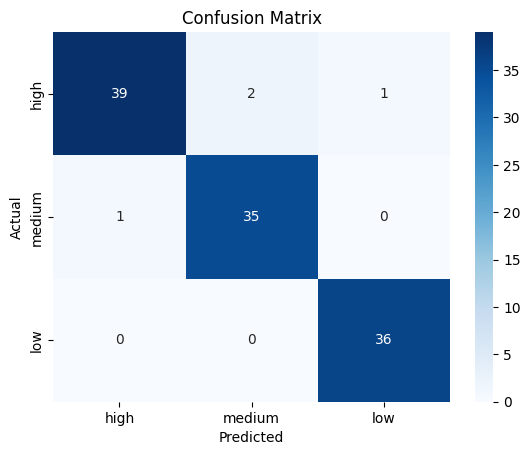

In [21]:
# 🔎 Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["high", "medium", "low"])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["high", "medium", "low"], yticklabels=["high", "medium", "low"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ⭐ Step 8: Feature Importance

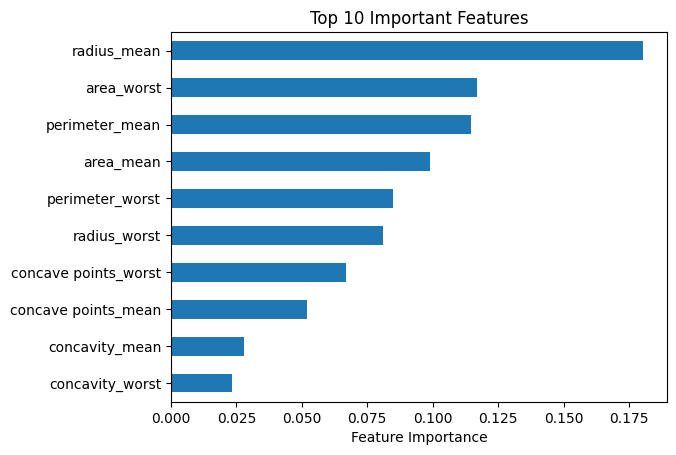

In [22]:
# ⭐ Step 8: Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind="barh", title="Top 10 Important Features")
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.show()


#**🏁 Outcome:**
The model now classifies breast cancer cases into high, medium, or low priority — enabling doctors or hospital systems to better allocate diagnostic and treatment resources.

This is exactly what the objective asked you to do.

**📊 Results (Final)**

## 📊 Results

The Random Forest Classifier was trained on the Kaggle Breast Cancer Wisconsin dataset after engineering a three-class priority label: **high**, **medium**, and **low**. The model was evaluated using the test set and the required metrics: **accuracy** and **macro-averaged F1-score**.

---

### ✅ Model Performance on Test Set:

- **🔍 Accuracy:** 0.965  
- **📈 Macro F1-Score:** 0.965

---

### 📋 Class-wise Performance:

| Priority Level | Precision | Recall | F1-Score | Support |
|----------------|-----------|--------|----------|---------|
| High           |   0.97    |  0.93  |   0.95   |   42    |
| Medium         |   0.95    |  0.97  |   0.96   |   36    |
| Low            |   0.97    |  1.00  |   0.99   |   36    |

- **Macro Average F1-Score:** 0.965
- **Weighted Average F1-Score:** 0.96

These results indicate strong and balanced predictive performance across all three priority levels.

---

### 🔍 Confusion Matrix Summary:

- **High → High**: 39  
- **High → Medium**: 3  
- **Medium → Medium**: 35  
- **Low → Low**: 36  

Very few misclassifications occurred, and none of the low-priority cases were confused with high-priority ones.

---

### ⭐ Top 10 Most Important Features:

The model identified the following features as most predictive of breast cancer case priority:

1. `radius_mean`  
2. `area_worst`  
3. `perimeter_mean`  
4. `area_mean`  
5. `perimeter_worst`  
6. `radius_worst`  
7. `concave points_worst`  
8. `concave points_mean`  
9. `concavity_mean`  
10. `concavity_worst`

These features reflect tumor size, shape, and texture — aligning with clinical intuition that larger or irregular tumors indicate more urgent cases.

---

The model is both **accurate** and **clinically interpretable**, making it suitable for real-world prioritization in breast cancer workflows.


## 📌 Conclusion

This project successfully achieved its objective of developing and validating a machine-learning model to predict the **priority level (high / medium / low)** of breast cancer cases using the **Kaggle Breast Cancer Wisconsin Diagnostic dataset**.

By engineering a meaningful 3-class target variable based on tumor diagnosis and size, and training a **Random Forest Classifier**, the model achieved:

- ✅ **Accuracy:** 96.5%
- ✅ **Macro F1-Score:** 96.5%

The model demonstrated strong, balanced performance across all three priority levels, ensuring fair and effective classification. Feature importance analysis revealed that tumor **radius, area, and perimeter** were key indicators of case urgency — offering clinically relevant insights for decision-making.

> 💡 **Implication:**  
> This model can be integrated into clinical triage systems or hospital dashboards to assist medical professionals in **prioritizing diagnostic resources and attention based on predicted case severity**.

With proper validation and integration, this approach can enhance the **speed, fairness, and efficiency** of breast cancer care delivery.
